<a href="https://colab.research.google.com/github/LIAORONGTIAN/DS_Python/blob/main/Prompt_Experiment_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prompt Experiment Data Analysis**

In [16]:
knitr::opts_chunk$set(echo = TRUE)

**Loading Data and Testing Assumptions**

In [38]:
library(readxl)
library(car) # Assuming car package is needed for leveneTest

df = read_excel("/content/sample_data/Prompt Generation.xlsx")

leveneTest(Outputlength ~ Model * Transcripttopics * PromptStyle, data = df)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,39,0.7619497,0.8151428
,59,NA,NA


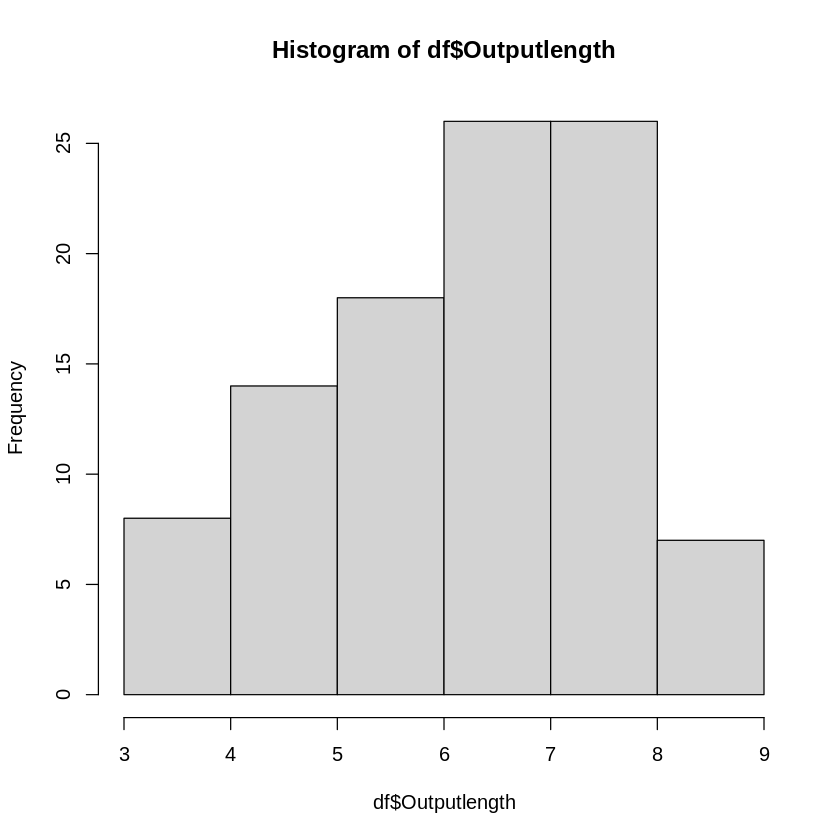

In [39]:
hist(df$Outputlength)

[1] 30 42

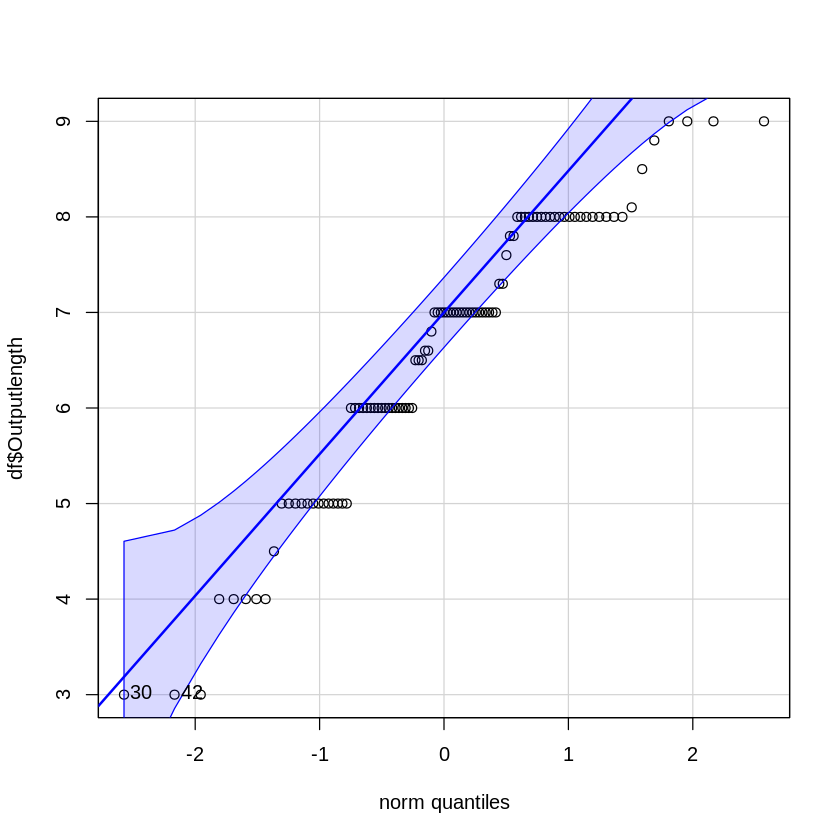

In [40]:
qqPlot(df$Outputlength)

**Fixing Normality**



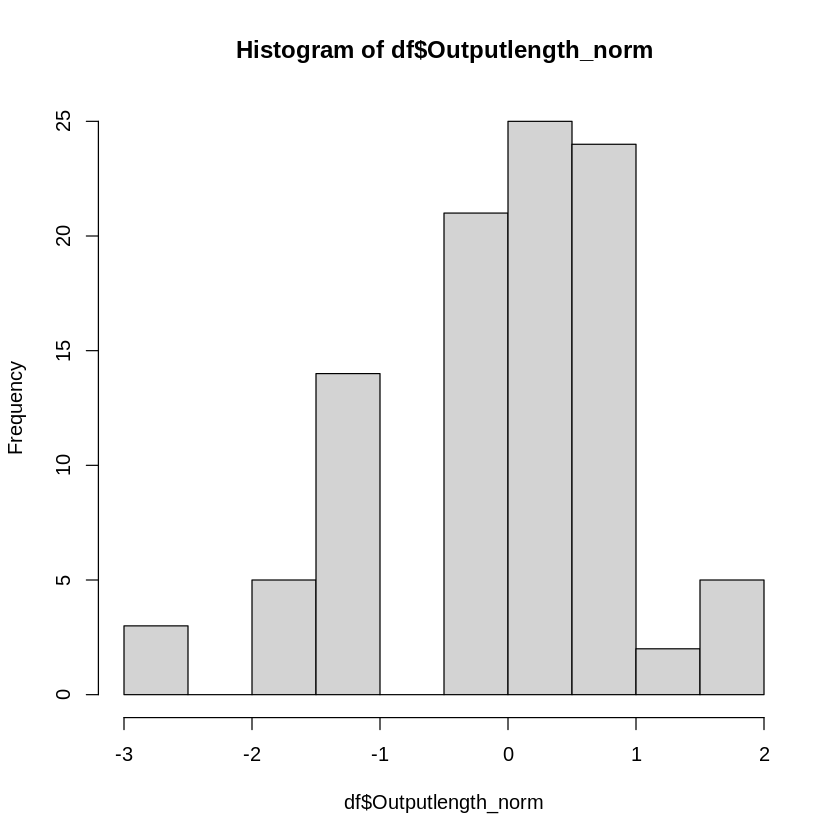

In [41]:
df$Outputlength_norm = scale(df$Outputlength)
df$Outputlength_log = log(df$Outputlength)
hist(df$Outputlength_norm)

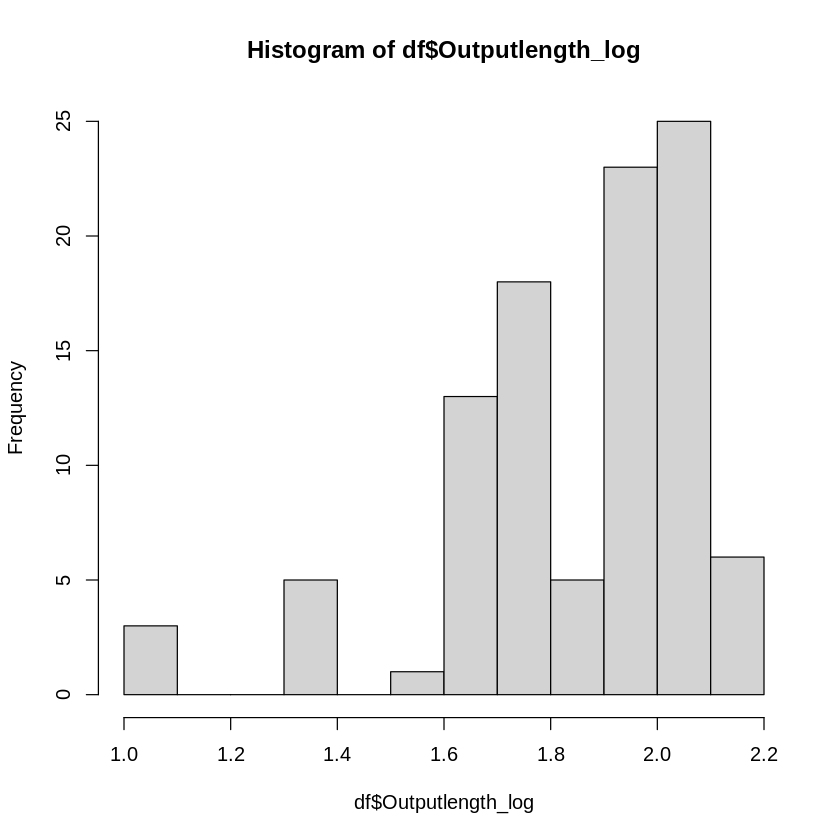

In [42]:
hist(df$Outputlength_log)

**Running Factorial ANOVA**

In [43]:
m1 = aov(Outputlength ~ Model * Transcripttopics * PromptStyle, data = df)
summary(m1)

                                   Df Sum Sq Mean Sq F value   Pr(>F)    
Model                               1   3.06   3.058   2.589   0.1129    
Transcripttopics                    4  57.18  14.295  12.106 3.01e-07 ***
PromptStyle                         3   2.48   0.827   0.700   0.5558    
Model:Transcripttopics              4   8.66   2.165   1.834   0.1344    
Model:PromptStyle                   3   3.87   1.289   1.092   0.3598    
Transcripttopics:PromptStyle       12  28.48   2.374   2.010   0.0392 *  
Model:Transcripttopics:PromptStyle 12  26.48   2.207   1.869   0.0575 .  
Residuals                          59  69.67   1.181                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

In [44]:
m2 = aov(Outputlength_norm ~ Model * Transcripttopics * PromptStyle, data = df)
summary(m2)

                                   Df Sum Sq Mean Sq F value   Pr(>F)    
Model                               1   1.50   1.499   2.589   0.1129    
Transcripttopics                    4  28.04   7.009  12.106 3.01e-07 ***
PromptStyle                         3   1.22   0.405   0.700   0.5558    
Model:Transcripttopics              4   4.25   1.062   1.834   0.1344    
Model:PromptStyle                   3   1.90   0.632   1.092   0.3598    
Transcripttopics:PromptStyle       12  13.97   1.164   2.010   0.0392 *  
Model:Transcripttopics:PromptStyle 12  12.98   1.082   1.869   0.0575 .  
Residuals                          59  34.16   0.579                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

In [45]:
m3 = aov(Outputlength_log ~ Model * Transcripttopics * PromptStyle, data = df)
summary(m3)

                                   Df Sum Sq Mean Sq F value   Pr(>F)    
Model                               1 0.1365  0.1365   3.784   0.0565 .  
Transcripttopics                    4 1.5425  0.3856  10.689 1.39e-06 ***
PromptStyle                         3 0.0603  0.0201   0.557   0.6455    
Model:Transcripttopics              4 0.2992  0.0748   2.073   0.0957 .  
Model:PromptStyle                   3 0.0974  0.0325   0.900   0.4469    
Transcripttopics:PromptStyle       12 0.7700  0.0642   1.779   0.0731 .  
Model:Transcripttopics:PromptStyle 12 0.8398  0.0700   1.940   0.0474 *  
Residuals                          59 2.1286  0.0361                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

**Visualizing Interaction Effect**

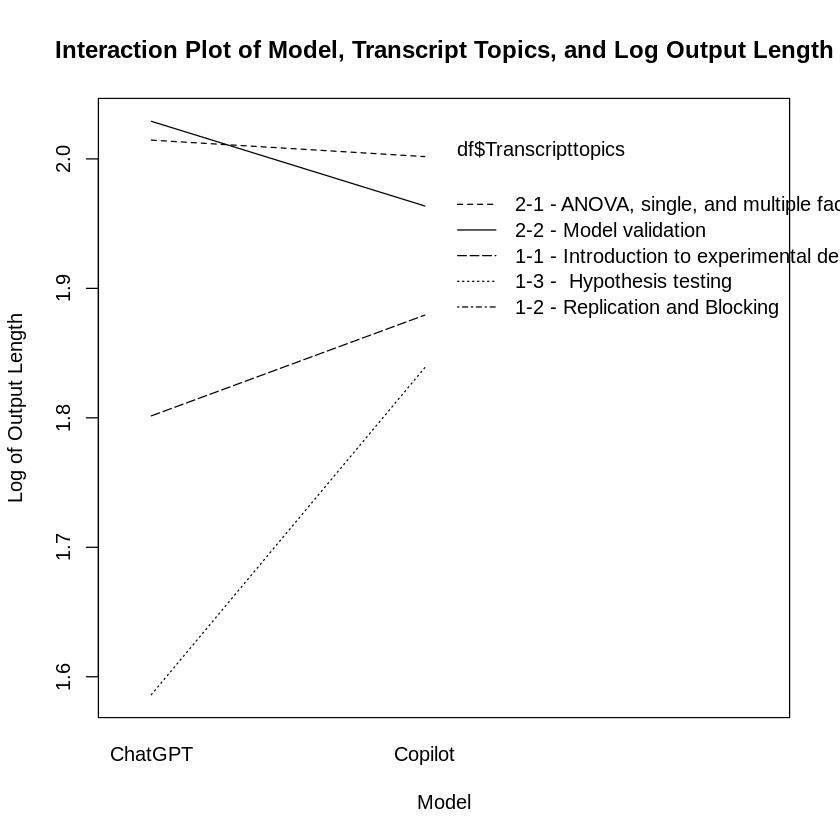

In [46]:
interaction.plot(df$Model, df$Transcripttopics, df$Outputlength_log, fun=mean, legend = TRUE,
    xlab = "Model", ylab = "Log of Output Length",
    main = "Interaction Plot of Model, Transcript Topics, and Log Output Length")

**Calculating Effect Sizes**

In [47]:
install.packages(c("MOTE"))
library(MOTE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("MOTE")):
“installation of package ‘MOTE’ had non-zero exit status”


In [48]:
#main effect of model/transcriptiontopics
eta.partial.SS(dfm = 4, dfe = 59, ssm = 0.2992, sse = 2.1286, Fvalue = 2.073)

$eta
[1] 0.1232391

$etalow
[1] 0

$etahigh
[1] 0.2550664

$dfm
[1] 4

$dfe
[1] 59

$F
[1] 2.073

$p
[1] 0.09577965

$estimate
[1] "$\\eta^2_{p}$ = .12, 95\\% CI [0.00, 0.26]"

$statistic
[1] "$F$(4, 59) = 2.07, $p$ = .096"

In [49]:
#main effect of model/promptstyle
eta.partial.SS(dfm = 3, dfe = 59, ssm =  0.0974, sse = 2.1286, Fvalue = 0.900)

$eta
[1] 0.04375562

$etalow
[1] 0

$etahigh
[1] 0.1462715

$dfm
[1] 3

$dfe
[1] 59

$F
[1] 0.9

$p
[1] 0.4466934

$estimate
[1] "$\\eta^2_{p}$ = .04, 95\\% CI [0.00, 0.15]"

$statistic
[1] "$F$(3, 59) = 0.90, $p$ = .447"

In [50]:
#main effect of transcriptiontoipics/promptstyle
eta.partial.SS(dfm = 12, dfe = 59, ssm =  0.7700, sse = 2.1286, Fvalue = 1.779)

$eta
[1] 0.2656455

$etalow
[1] 0

$etahigh
[1] 0.3282474

$dfm
[1] 12

$dfe
[1] 59

$F
[1] 1.779

$p
[1] 0.07303485

$estimate
[1] "$\\eta^2_{p}$ = .27, 95\\% CI [0.00, 0.33]"

$statistic
[1] "$F$(12, 59) = 1.78, $p$ = .073"

In [51]:
#main effect of modal/transcriptiontoipics/promptstyle
eta.partial.SS(dfm = 12, dfe = 59, ssm =  0.8398, sse = 2.1286, Fvalue = 1.940)

$eta
[1] 0.2829134

$etalow
[1] 0

$etahigh
[1] 0.3494266

$dfm
[1] 12

$dfe
[1] 59

$F
[1] 1.94

$p
[1] 0.04739685

$estimate
[1] "$\\eta^2_{p}$ = .28, 95\\% CI [0.00, 0.35]"

$statistic
[1] "$F$(12, 59) = 1.94, $p$ = .047"

**Assessing Inter-rater Reliability**

In [52]:
cor.test(df$Rater1, df$Rater2)


	Pearson's product-moment correlation

data:  df$Rater1 and df$Rater2
t = 8.2936, df = 98, p-value = 5.971e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5101242 0.7446807
sample estimates:
      cor 
0.6421958 


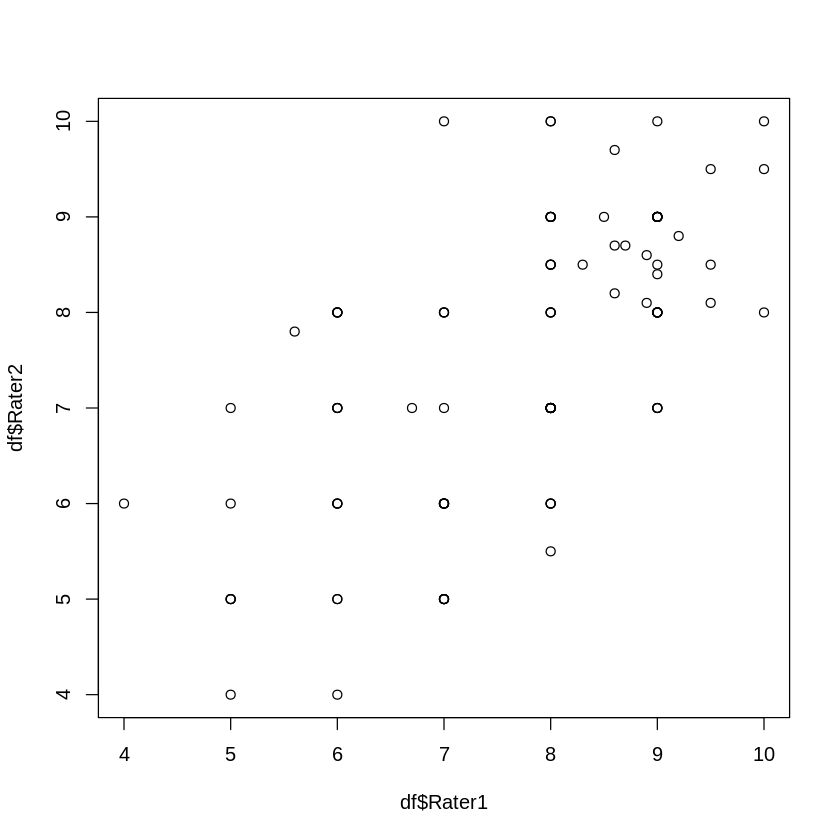

In [53]:
plot(df$Rater1, df$Rater2)